In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import xgboost as xgb
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [2]:
# Reading the cleaned dataset
df = pd.read_csv('..\Cleaned_Data\Cleaned_Data_LogPrice.csv')
df.head()

Rooms Type      Price  Distance  Bathroom  Car                 Region  \
0      2    h  1480000.0       2.5       1.0  1.0  Northern Metropolitan   
1      2    h  1035000.0       2.5       1.0  0.0  Northern Metropolitan   
2      3    h  1465000.0       2.5       2.0  0.0  Northern Metropolitan   
3      3    h   850000.0       2.5       2.0  1.0  Northern Metropolitan   
4      4    h  1600000.0       2.5       1.0  2.0  Northern Metropolitan   

   Log_Price  
0  14.207553  
1  13.849913  
2  14.197366  
3  13.652993  
4  14.285515

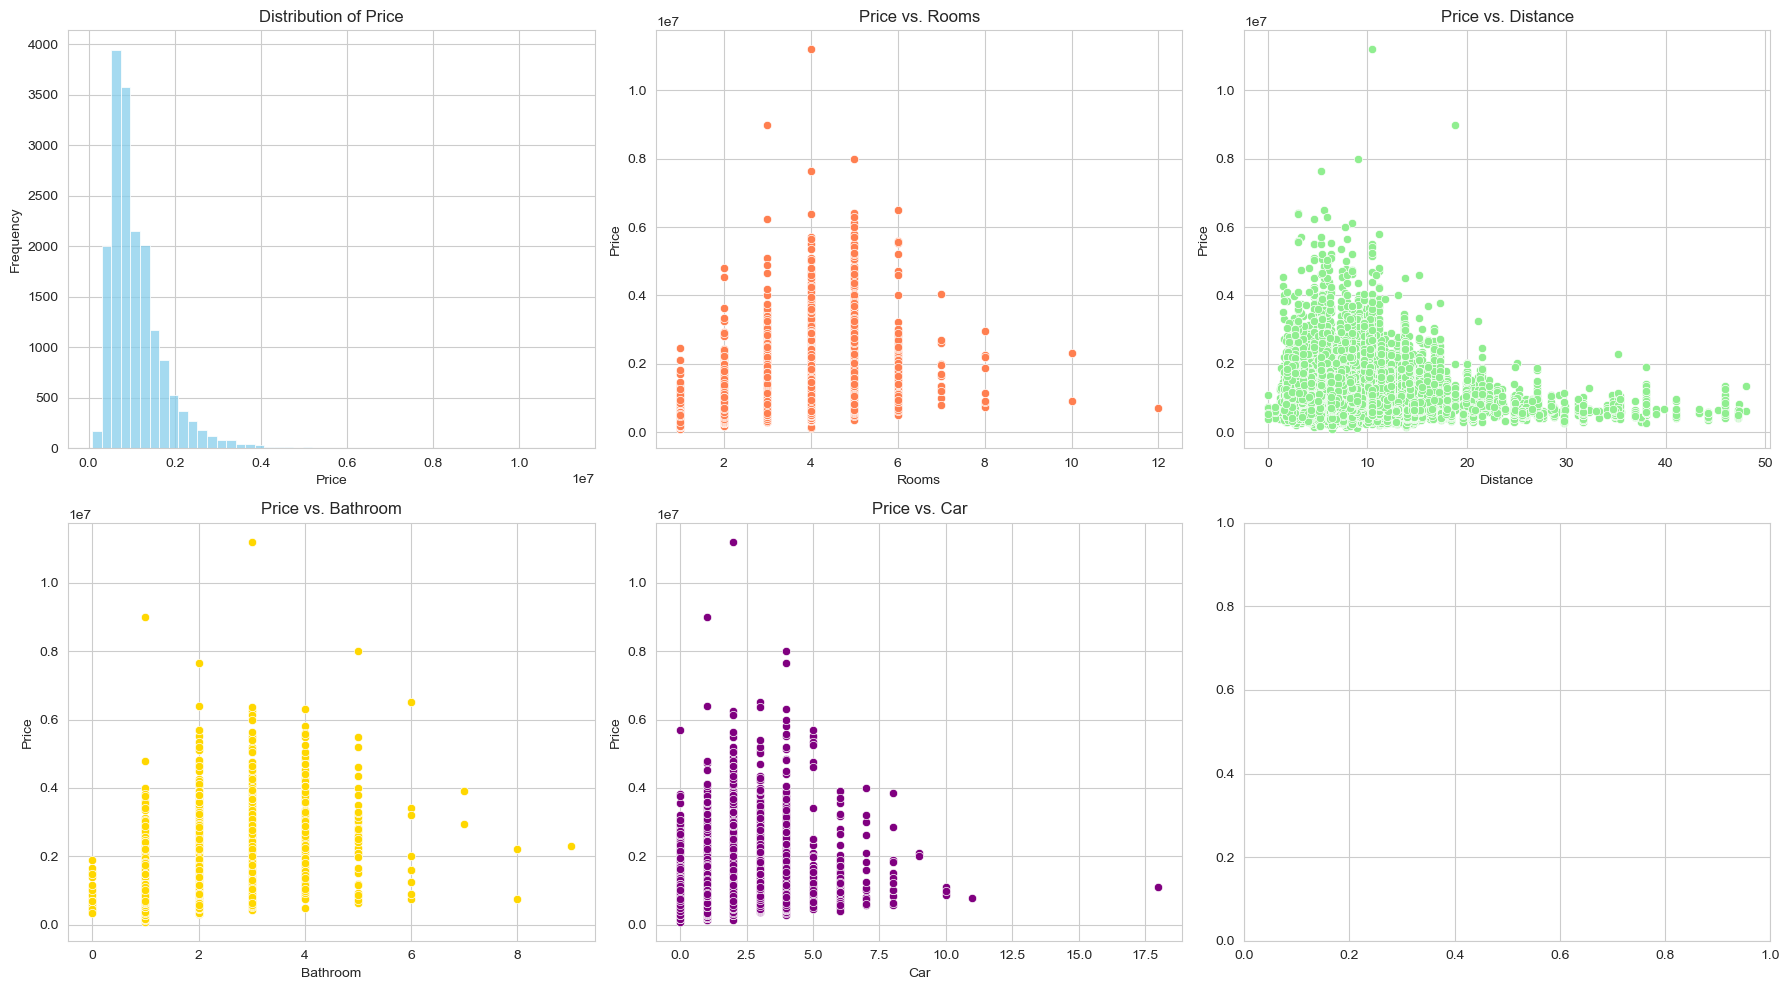

In [5]:
# Set the style for plots
sns.set_style("whitegrid")

# Create a figure with multiple subplots
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

# Plot the distribution of the target variable (Price)
sns.histplot(df['Price'], bins=50, ax=ax[0, 0], color='skyblue')
ax[0, 0].set_title('Distribution of Price')
ax[0, 0].set_xlabel('Price')
ax[0, 0].set_ylabel('Frequency')

# Plot the relationship between Price and other numeric features
sns.scatterplot(data=df, x='Rooms', y='Price', ax=ax[0, 1], color='coral')
ax[0, 1].set_title('Price vs. Rooms')
sns.scatterplot(data=df, x='Distance', y='Price', ax=ax[0, 2], color='lightgreen')
ax[0, 2].set_title('Price vs. Distance')
sns.scatterplot(data=df, x='Bathroom', y='Price', ax=ax[1, 0], color='gold')
ax[1, 0].set_title('Price vs. Bathroom')
sns.scatterplot(data=df, x='Car', y='Price', ax=ax[1, 1], color='purple')
ax[1, 1].set_title('Price vs. Car')

# Adjust layout
plt.tight_layout()
plt.show()

In [6]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

missing_values

Rooms        0
Type         0
Price        0
Distance     0
Bathroom     0
Car          0
Region       0
Log_Price    0
dtype: int64

In [7]:
# Enumerate Type
encode = LabelEncoder().fit(df['Type'])
carpet = {x: i for i, x in enumerate(encode.classes_)}
carpet

{'h': 0, 't': 1, 'u': 2}

In [8]:
# Enumerate Region
encoder = LabelEncoder().fit(df['Region'])
carp = {x: i for i, x in enumerate(encoder.classes_)}
carp

{'Eastern Metropolitan': 0,
 'Eastern Victoria': 1,
 'Northern Metropolitan': 2,
 'Northern Victoria': 3,
 'South-Eastern Metropolitan': 4,
 'Southern Metropolitan': 5,
 'Western Metropolitan': 6,
 'Western Victoria': 7}

In [9]:
# Convert to numerical variable 
df['Type'] = LabelEncoder().fit_transform(df['Type'])
df['Type']

0        0
1        0
2        0
3        0
4        0
        ..
17693    0
17694    0
17695    0
17696    1
17697    0
Name: Type, Length: 17698, dtype: int32

In [10]:
df['Region'] = LabelEncoder().fit_transform(df['Region'])
df['Region']

0        2
1        2
2        2
3        2
4        2
        ..
17693    2
17694    6
17695    6
17696    6
17697    6
Name: Region, Length: 17698, dtype: int32

In [11]:
# Convert categorical data to numeric and separate target feature for training data
X = df.drop(["Log_Price", 'Price'],  axis = 1)

y = df['Price']

X

Rooms  Type  Distance  Bathroom  Car  Region
0          2     0       2.5       1.0  1.0       2
1          2     0       2.5       1.0  0.0       2
2          3     0       2.5       2.0  0.0       2
3          3     0       2.5       2.0  1.0       2
4          4     0       2.5       1.0  2.0       2
...      ...   ...       ...       ...  ...     ...
17693      3     0      25.5       2.0  2.0       2
17694      4     0       6.3       1.0  3.0       6
17695      2     0       6.3       2.0  1.0       6
17696      2     1       6.3       1.0  2.0       6
17697      2     0       6.3       1.0  0.0       6

[17698 rows x 6 columns]

In [12]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14158, 6), (3540, 6), (14158,), (3540,))

In [13]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = lr_model.predict(X_test)

# Calculate evaluation metrics
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = mean_squared_error(y_test, y_pred, squared=False)
lr_mae = mean_absolute_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

lr_mse, lr_rmse, lr_mae, lr_r2

(267794257353.3634, 517488.41277207684, 348003.2854689587, 0.3916199619836014)

In [14]:
# Initialize the Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_dt = dt_model.predict(X_test)

# Calculate evaluation metrics
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_rmse = mean_squared_error(y_test, y_pred_dt, squared=False)
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

dt_mse, dt_rmse, dt_mae, dt_r2

(189146690792.17062, 434909.9801018259, 235181.85430560872, 0.570292985099475)

In [15]:

# Initialize the Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

rf_mse, rf_rmse, rf_mae, rf_r2

(152095043322.4953, 389993.64523347723, 217899.5641497179, 0.6544676157243097)

In [16]:
# Initialize the Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_gb = gb_model.predict(X_test)

# Calculate evaluation metrics
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_rmse = mean_squared_error(y_test, y_pred_gb, squared=False)
gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

gb_mse, gb_rmse, gb_mae, gb_r2

(150442489837.86115, 387869.16587666667, 229094.7402045718, 0.6582219178581273)

In [19]:
# Initialize the RandomizedSearchCV object
param_dists = {'criterion' : ['squared_error', 'friedman_mse',], 
                       'max_depth': [3,4,7, None],
                        'min_samples_split':np.arange(0.1, 1.1, 0.1),
                        'min_samples_leaf' : list(range(1, 21)), 
                        'max_features' : ['sqrt', 'log2', None]}

random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=param_dists,
    n_iter=50,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the random search model
random_search.fit(X_train, y_train)

# Get the best parameters from the RandomizedSearchCV
best_params = random_search.best_params_

best_params

Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'min_samples_split': 0.1,
 'min_samples_leaf': 13,
 'max_features': None,
 'max_depth': None,
 'criterion': 'friedman_mse'}